# A simple Neural Network implemented by Python

## Deep Neural Network

In [40]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt

### Activation function

In [41]:
def sigmoid(x):
    # Sigmoid function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

### A Neuron

In [42]:
class Neuron:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # Linear combination
        output = inputs @ self.weights + self.bias
        return sigmoid(output)

### A Simple Deep Neural Network with only feedforward

In [43]:
class NeuralNetwork:
    """
    A neural network with 1 hidden layer
    """

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        # Neuron 1 in hidden layer
        out_h1 = self.h1.feedforward(x)
        # Neuron 2 in hidden layer
        out_h2 = self.h2.feedforward(x)

        # output layer
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


### Generate Fake data

In [44]:
fake_data = np.array([[-2, -1, 1],
                      [25, 6, 0],
                      [17, 4, 0],
                      [-15, -6, 1]])

X = fake_data[:, :-1]
Y = fake_data[:, -1]

print(X)
print(Y)

[[ -2  -1]
 [ 25   6]
 [ 17   4]
 [-15  -6]]
[1 0 0 1]


### Loss Function

We use MSE to calculate the loss between prediction and ground truth.

$MSE=\frac{1}{N}||y_{true} - y_{pred}||^2=\frac{1}{N}(y_{true}-y_{pred})^T(y_{true}-y_{pred})$

We want to minimize the loss function!

In [45]:
def MSE(y_true, y_pred):
    # y_true and y_pred should be the same shape
    return np.mean(np.power(y_true - y_pred, 2))

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])
print(MSE(y_true, y_pred))

0.5


### BackPropagation

We still want to use the Gradient Descent to optimize our loss function, but the problem is,
how to calculate the gradient?

Consider that we represent the loss of the whole network as:
$L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$. While $w_1....w_6$ are weight parameters,
$b_1...b_3$ are bias parameters.

What we want to calculate is the partial derivative of $L$ respect to $w_1....w_6$

We first calculate the derivative of $L$ respect to $w_6$:
$\frac{\partial L}{\partial w_6}=\frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial w_1}$

Since we already know that:
$L=MSE=\frac{1}{N}||y_{true} - y_{pred}||^2=\frac{1}{N}(y_{true}-y_{pred})^T(y_{true}-y_{pred})$

We can easily calculate $\frac{\partial L}{\partial y_{pred}}$:

\begin{align}
\frac{\partial L}{\partial y_{pred}}
&=\frac{\partial (\frac{1}{N}(y_{true}-y_{pred})^T(y_{true}-y_{pred}))}{\partial y_{pred}}\\
&=\frac{1}{N}\frac{\partial ({y_{true}}^Ty_{true}-{y_{true}}^Ty_{pred}-{y_{pred}}^Ty_{true}+{y_{pred}}^T{y_{pred}})}{\partial y_{pred}}\\
&=-2(y_{true}-y_{pred})^T\\
&=-2({y_{true}}^T-{y_{pred}}^T)
\end{align}

Now we are going to calculate $\frac{\partial y_{pred}}{\partial w_6}$, $h_1, h_2, o_1$ represent the output of their neuron respectively:

$y_{pred}=o_1=f(w_5h_1 + w_6h_2 + b_3)$

So we have:

\begin{align}
\frac{\partial y_{pred}}{\partial w_6}&=\frac{\partial f(w_5h_1 + w_6h_2 + b_3)}{\partial w_6}\\
&=h_2 * f^{'}(w_5h_1 + w_6h_2 + b_3)
\end{align}

As we have mentioned before, the function $f$ is our activation function, while at there is sigmoid function.

$f(x)=\frac{1}{1-e^{-x}}$
$f^{'}(x)=\frac{e^x}{(1+e^{-x})^2}=f(x)*(1-f(x))$

So that we can calculate the partial derivative:

\begin{align}
\frac{\partial y_{pred}}{\partial w_6}&=h_2*\frac{e^{w_5h_1 + w_6h_2 + b_3}}{(1+e^{-(w_5h_1 + w_6h_2 + b_3)})^2}
\end{align}

So finally we can calculate the derivative of $L$ respect to $w_6$
$\frac{\partial L}{\partial w_6}=\frac{\partial L}{\partial y_{pred}}\frac{\partial y_{pred}}{\partial w_6}$

### Train: Using SGD

In [46]:
def derive_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)  # The derivative of sigmoid function f(x) * (1 - f(x))

class OurNeuralNetwork:
    """
    The structure of the network is a one hidden layer with two neurons network

    DO NOT USE IT IN REAL LIFE PROBLEM!
    JUST USE IT TO UNDERSTAND HOW DNN WORKS!
    """

    def __init__(self):
        # Randomly initialize weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Randomly initialize biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return h1, h2, o1

    def train(self, train_x, train_y):
        """
        :param train_x: a Nx2 numpy array, N is the number of sample
        :param train_y: a Nx1 numpy array, N is the number of sample
        :return:
        """
        lr = 0.1
        epochs = 1000

        losses = []

        for epoch in range(epochs):
            for x, y in zip(train_x, train_y):
                h1, h2, o1 = self.feedforward(x)

                # Calculate derivative
                d_L_ypred = -2 * (y - o1)  # partial L / partial y_pred

                d_ypred_w6 = h2 * derive_sigmoid(o1)
                d_ypred_w5 = h1 * derive_sigmoid(o1)
                d_ypred_b3 = derive_sigmoid(o1)
                
                d_ypred_h1 = self.w5 * derive_sigmoid(o1)
                d_ypred_h2 = self.w6 * derive_sigmoid(o1)

                d_h1_w1 = x[0] * derive_sigmoid(h1)
                d_h1_w2 = x[1] * derive_sigmoid(h1)
                d_h1_b1 = derive_sigmoid(h1)

                d_h2_w3 = x[0] * derive_sigmoid(h2)
                d_h2_w4 = x[1] * derive_sigmoid(h2)
                d_h2_b2 = derive_sigmoid(h2)

                # Update weights and biases
                # Neuron h1
                self.w1 -= lr * d_L_ypred * d_ypred_h1 * d_h1_w1
                self.w2 -= lr * d_L_ypred * d_ypred_h1 * d_h1_w2
                self.b1 -= lr * d_L_ypred * d_ypred_h1 * d_h1_b1

                self.w3 -= lr * d_L_ypred * d_ypred_h2 * d_h2_w3
                self.w4 -= lr * d_L_ypred * d_ypred_h2 * d_h2_w4
                self.b2 -= lr * d_L_ypred * d_ypred_h2 * d_h2_b2

                self.w5 -= lr * d_L_ypred * d_ypred_w5
                self.w6 -= lr * d_L_ypred * d_ypred_w6
                self.b3 -= lr * d_L_ypred * d_ypred_b3

            # Calculate the Loss
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, X)[:, -1]
                loss = MSE(Y, y_preds)
                losses.append(loss)
                print("Epoch %d loss: %.3f" % (epoch, loss))
        return losses

n = OurNeuralNetwork()
losses = n.train(X, Y)

Epoch 0 loss: 0.057
Epoch 10 loss: 0.032
Epoch 20 loss: 0.022
Epoch 30 loss: 0.016
Epoch 40 loss: 0.013
Epoch 50 loss: 0.011
Epoch 60 loss: 0.009
Epoch 70 loss: 0.008
Epoch 80 loss: 0.007
Epoch 90 loss: 0.006
Epoch 100 loss: 0.005
Epoch 110 loss: 0.005
Epoch 120 loss: 0.004
Epoch 130 loss: 0.004
Epoch 140 loss: 0.003
Epoch 150 loss: 0.003
Epoch 160 loss: 0.003
Epoch 170 loss: 0.003
Epoch 180 loss: 0.002
Epoch 190 loss: 0.002
Epoch 200 loss: 0.002
Epoch 210 loss: 0.002
Epoch 220 loss: 0.002
Epoch 230 loss: 0.002
Epoch 240 loss: 0.002
Epoch 250 loss: 0.001
Epoch 260 loss: 0.001
Epoch 270 loss: 0.001
Epoch 280 loss: 0.001
Epoch 290 loss: 0.001
Epoch 300 loss: 0.001
Epoch 310 loss: 0.001
Epoch 320 loss: 0.001
Epoch 330 loss: 0.001
Epoch 340 loss: 0.001
Epoch 350 loss: 0.001
Epoch 360 loss: 0.001
Epoch 370 loss: 0.001
Epoch 380 loss: 0.001
Epoch 390 loss: 0.001
Epoch 400 loss: 0.001
Epoch 410 loss: 0.001
Epoch 420 loss: 0.001
Epoch 430 loss: 0.001
Epoch 440 loss: 0.001
Epoch 450 loss: 0.001

/home/roger/miniconda3/envs/NeuralNetwork/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot loss curve

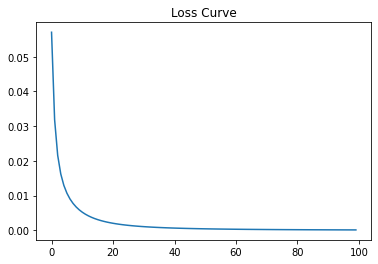

In [48]:
plt.title('Loss Curve')
plt.plot(losses)
plt.show()